In [111]:
#import necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [112]:
#importing a data file from prject folder
measure_data = pd.read_csv("M:\Machine Learning Start with CIT\GitHub Projects Machine Learning Algorithm\Data files\data.csv")

In [113]:
measure_data.head()

,x,y
0,48.955889,60.723602
1,44.687196,82.892504
2,60.297327,97.379897
3,45.618644,48.847153
4,38.816818,56.877213


# Data Clean

In [114]:
measure_data = measure_data.rename(columns={'x':'height', 'y':'weight'})

In [115]:
measure_data.head()

,height,weight
0,48.955889,60.723602
1,44.687196,82.892504
2,60.297327,97.379897
3,45.618644,48.847153
4,38.816818,56.877213


In [116]:
measure_data.shape

(99, 2)

In [117]:
measure_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  99 non-null     float64
 1   weight  99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


In [118]:
measure_data.describe()

,height,weight
count,99.000000,99.000000
mean,49.124564,73.149475
std,9.652463,16.216558
min,25.128485,41.412885
25%,41.648159,61.088576
50%,50.030174,72.247251
75%,56.798054,83.287411
max,70.346076,118.591217


In [119]:
measure_data.duplicated().sum()

np.int64(0)

In [120]:
measure_data.isna().sum()

height    0
weight    0
dtype: int64

# vizualization

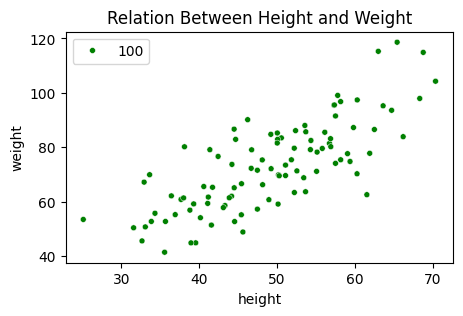

In [121]:
plt.figure(figsize=(5,3))
sns.scatterplot(data=measure_data,
                x='height',
                y='weight',
                color='green',
                size=100)
plt.title('Relation Between Height and Weight')
plt.show()

In [122]:
measure_data.corr()

,height,weight
height,1.000000,0.766264
weight,0.766264,1.000000


<Axes: >

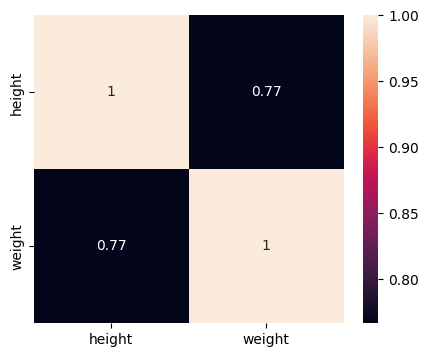

In [123]:
plt.figure(figsize=(5,4))
sns.heatmap(measure_data.corr(), annot=True)

In [124]:
measure_data.head()

,height,weight
0,48.955889,60.723602
1,44.687196,82.892504
2,60.297327,97.379897
3,45.618644,48.847153
4,38.816818,56.877213


In [125]:
#data separation
x = measure_data[['height']]
y = measure_data[['weight']]

In [126]:
# Split the data 
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.1, random_state=42)

In [127]:
xtrain.head()

,height
31,42.436477
76,36.930077
47,33.864215
26,63.615561
44,32.669044


In [128]:
ytrain.head()

,weight
31,76.617341
76,55.231661
47,52.725494
26,95.229366
44,45.570589


In [129]:
xtest.head()

,height
62,50.135485
40,43.318283
95,49.239765
18,48.105042
97,48.149859


In [130]:
ytest.head()

,weight
62,59.108839
40,58.569825
95,72.111832
18,75.331242
97,66.224958


In [131]:
#model implementation
lr = LinearRegression()

In [132]:
lr

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [133]:
# train the model
model = lr.fit(xtrain,ytrain)

In [134]:
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [135]:
# check the score
model.score(xtrain, ytrain)

0.5910406918480579

In [136]:
# test the model
model.score(xtest, ytest)

0.2655300718247442

In [137]:
#prediction generate
pred_y = model.predict(xtest)
pred_y

array([[75.0691538 ],
       [66.46560094],
       [73.93872307],
       [72.5066614 ],
       [72.5632223 ],
       [80.30261767],
       [61.71986565],
       [67.1626611 ],
       [80.39008453],
       [73.58046047]])

In [138]:
xtest.shape, ytest.shape, pred_y.shape

((10, 1), (10, 1), (10, 1))

In [139]:
pred_y = model.predict([[50]])
pred_y

c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[74.89816629]])

In [140]:
measure_data['predicted'] = model.predict(measure_data[['height']])

In [141]:
measure_data.head()

,height,weight,predicted
0,48.955889,60.723602,73.580460
1,44.687196,82.892504,68.193219
2,60.297327,97.379897,87.893760
3,45.618644,48.847153,69.368739
4,38.816818,56.877213,60.784592


In [142]:
measure_data['error'] = measure_data['weight'] - measure_data['predicted']

In [143]:
measure_data.head()

,height,weight,predicted,error
0,48.955889,60.723602,73.580460,-12.856858
1,44.687196,82.892504,68.193219,14.699285
2,60.297327,97.379897,87.893760,9.486137
3,45.618644,48.847153,69.368739,-20.521585
4,38.816818,56.877213,60.784592,-3.907378


In [144]:
ytest.head()

,weight
62,59.108839
40,58.569825
95,72.111832
18,75.331242
97,66.224958


In [145]:
y_pred = model.predict(xtest)

In [146]:
#mse  for checking error
mse = mean_squared_error(ytest, y_pred)
mse

85.67182617423538

In [147]:
mae = mean_absolute_error(ytest, y_pred)
mae

7.356874456713063

In [148]:
# check the rscore
r_score = r2_score(ytest, y_pred)
r_score

0.2655300718247442

In [149]:
#find the value of m 
m = model.coef_
m

array([[1.26203562]])

In [150]:
#find the value of c
c = model.intercept_
c

array([11.79638513])

In [151]:
y = m * 50 + c 
y

array([[74.89816629]])

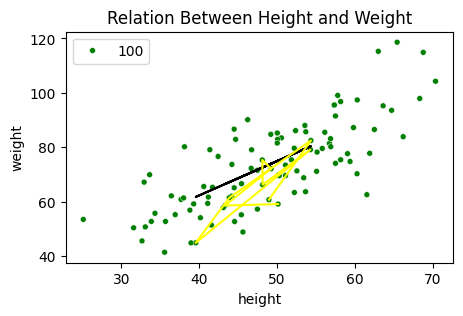

In [152]:
plt.figure(figsize=(5,3))
sns.scatterplot(data=measure_data,
                x='height',
                y='weight',
                color='green',
                size=100)
plt.plot(xtest, y_pred, color='black')
plt.plot(xtest, ytest, color='yellow')
plt.title('Relation Between Height and Weight')
plt.show()

In [153]:
df = pd.read_csv("M:\Machine Learning Start with CIT\GitHub Projects Machine Learning Algorithm\Data files\Data.csv")

In [154]:
df.head()

,x,y
0,48.955889,60.723602
1,44.687196,82.892504
2,60.297327,97.379897
3,45.618644,48.847153
4,38.816818,56.877213


In [155]:
df = df.rename(columns={"x":"height", "y":"weight"})
df.head()

,height,weight
0,48.955889,60.723602
1,44.687196,82.892504
2,60.297327,97.379897
3,45.618644,48.847153
4,38.816818,56.877213


# Data Clean

In [156]:
df.shape

(99, 2)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  99 non-null     float64
 1   weight  99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


In [158]:
df.duplicated().sum()

np.int64(0)

In [159]:
df.isna().sum()

height    0
weight    0
dtype: int64

In [160]:
df.describe()

,height,weight
count,99.000000,99.000000
mean,49.124564,73.149475
std,9.652463,16.216558
min,25.128485,41.412885
25%,41.648159,61.088576
50%,50.030174,72.247251
75%,56.798054,83.287411
max,70.346076,118.591217


# Data Vizualaization

Text(0, 0.5, 'Weight')

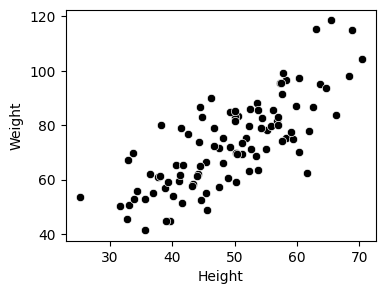

In [161]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=df, x='height', y='weight', color='black')
plt.xlabel('Height')
plt.ylabel('Weight')

In [162]:
df.corr()

,height,weight
height,1.000000,0.766264
weight,0.766264,1.000000


<Axes: >

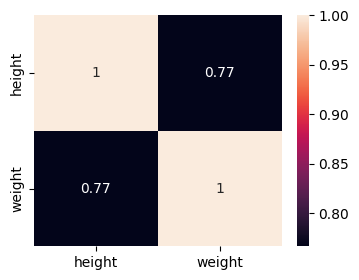

In [163]:
plt.figure(figsize=(4,3))
sns.heatmap(df.corr(), annot=True)

In [164]:
#feature/Target split
x = df[['height']]
y = df[['weight']]

In [165]:
x.head()

,height
0,48.955889
1,44.687196
2,60.297327
3,45.618644
4,38.816818


In [166]:
y.head()

,weight
0,60.723602
1,82.892504
2,97.379897
3,48.847153
4,56.877213


In [167]:
#train Test split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1, random_state=42)

In [168]:
xtrain.head()

,height
31,42.436477
76,36.930077
47,33.864215
26,63.615561
44,32.669044


In [169]:
ytrain.head()

,weight
31,76.617341
76,55.231661
47,52.725494
26,95.229366
44,45.570589


In [170]:

xtest.head()

,height
62,50.135485
40,43.318283
95,49.239765
18,48.105042
97,48.149859


In [171]:
ytest.head()

,weight
62,59.108839
40,58.569825
95,72.111832
18,75.331242
97,66.224958


In [172]:
#model implementation
linR = LinearRegression()

In [173]:
linR

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [174]:
#train the model
model = linR.fit(xtrain, ytrain)

In [175]:
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [176]:
#check the score
model.score(xtrain, ytrain)

0.5910406918480579

In [177]:
model.score(xtest, ytest)

0.2655300718247442

In [178]:
#prediction generate
pred_y = model.predict(xtest)
pred_y

array([[75.0691538 ],
       [66.46560094],
       [73.93872307],
       [72.5066614 ],
       [72.5632223 ],
       [80.30261767],
       [61.71986565],
       [67.1626611 ],
       [80.39008453],
       [73.58046047]])

In [179]:
pred_y = model.predict([[42]])
pred_y

c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[64.8018813]])

In [180]:
df['predicted'] = model.predict(df[['height']])
df.head()

,height,weight,predicted
0,48.955889,60.723602,73.580460
1,44.687196,82.892504,68.193219
2,60.297327,97.379897,87.893760
3,45.618644,48.847153,69.368739
4,38.816818,56.877213,60.784592


In [181]:
df['error'] = df['weight'] - df['predicted']
df.head()

,height,weight,predicted,error
0,48.955889,60.723602,73.580460,-12.856858
1,44.687196,82.892504,68.193219,14.699285
2,60.297327,97.379897,87.893760,9.486137
3,45.618644,48.847153,69.368739,-20.521585
4,38.816818,56.877213,60.784592,-3.907378


In [197]:
#model parameter
m = model.coef_
m

array([[1.26203562]])

In [198]:
c = model.intercept_
c

array([11.79638513])

In [199]:
pred_y = model.predict([[100]])
pred_y

c:\Users\MD Maruf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[137.99994745]])

In [200]:
y = m * 100 + c
y

array([[137.99994745]])

In [201]:
prdict_y = model.predict(xtest)

In [206]:
#check mse
mae = mean_absolute_error(ytest, prdict_y)
mae

7.356874456713063

In [207]:
mse = mean_squared_error(ytest, prdict_y)
mse

85.67182617423538

In [209]:
r2 = r2_score(ytest, prdict_y)
r2

0.2655300718247442